# Comparison of Three Methods to Clear Sponge-Wedge Chips

## Summary Graphs

### Data

In [1]:
data_csv_filename = 'method_comparison_data.xlsx'

In [2]:
def _get_src_dir() -> str:
    return os.path.split(os.path.dirname(os.path.abspath('__file__')))[0]

In [43]:
import os
from pathlib import Path
os.chdir(_get_src_dir())
from src.utility import _Utility
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.mixture import GaussianMixture

In [4]:
data_path = os.path.join(_Utility.get_user_data_dir_path(), data_csv_filename)

In [5]:
print(data_path)

/home/mkrause/data/biofuel-cell/method_comparison_data.xlsx


#### Read all sheets of the Excel file

In [6]:
try:
    xlsx = pd.read_excel(data_path, sheet_name=None)
    print(xlsx.keys())
except FileNotFoundError as e:
    print(f'Error: {e}')
    path = Path(data_path)
    if not _Utility.path_exists(path):
        print(f"path {path} doesn't exist")
    if not _Utility.dir_exists(path):
        print(f"directory 'data' doesn't exist")
    if not _Utility.file_exists(path):
        print(f"file {data_csv_filename} doesn't exist")

dict_keys(['Sheet1'])


Add a 'Sheet' column to each dataframe. This is necessary because the sheet names are not a column in the Excel file.

In [7]:
# for sheet_name in xlsx.keys():
#     xlsx[sheet_name]['Sheet'] = sheet_name

Concatenate sheets of positive controls into one DataFrame

In [8]:
df = pd.concat(xlsx[frame] for frame in xlsx.keys())

### Define constants for the analysis

In [9]:
col_data = '% cleared'
col_category = 'experiment ID'
col_iteration = 'iteration'
col_chip_id = 'chip ID'
col_section = 'chip side(f or b)'
experiments = (1, 2, 3)
col_frac_not_cleared = 'number of channels not cleared'
fig_png = 'png'
fig_svg = 'svg'
title = 'Comparison of Clearance Methods'
# df[df[col_category] == 3]

Cast all entries in the column holding the chip IDs as strings.

In [10]:
df[col_chip_id] = df[col_chip_id].astype(str)

Make sure that our dataframe has no NANs in the `% cleared` column

In [11]:
df = df[df[col_frac_not_cleared] > 1.0]
df

,experiment ID,image filename,chip ID,chip side(f or b),iteration,number of channels not cleared,% cleared
0,3,IMG_7478,N-1,front,1,36,43.7500
1,3,IMG_7479,N-1,back,1,28,56.2500
2,3,IMG_7480,N-2,front,1,20,68.7500
3,3,IMG_7481,N-2,back,1,32,50.0000
4,3,IMG_7482,N-3,front,1,24,62.5000
5,3,IMG_7483,N-3,back,1,30,53.1250
6,3,IMG_7533,N-1,front,2,13,79.6875
7,3,IMG_7534,N-1,back,2,8,87.5000
8,3,IMG_7531,N-2,front,2,8,87.5000
9,3,IMG_7530,N-2,back,2,22,65.6250


## Plot all data

### Plot individual data by experiment ID and iteration

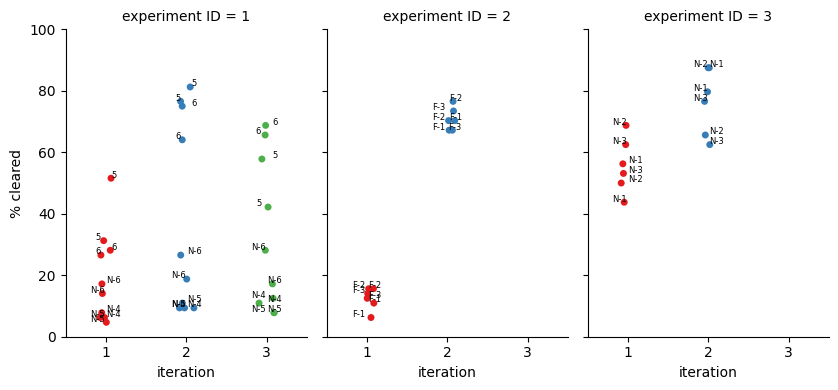

In [12]:
palette = "Set1"

g = sns.catplot(
    data=df,
    x=col_iteration,
    y=col_data,
    col=col_category,
    hue=col_iteration,
    kind='strip',  # show individual data points
    dodge=False,
    height=4,
    aspect=0.7,
    legend=False,
    palette=palette
)

df[df[col_category] == 1]

# Label each data point with its ID.
for ax in g.axes.flat:
    category: str = ax.get_title().split(' = ')[1]
    category_df: pd.DataFrame = df[df[col_category] == int(category)]
    for index, row in category_df.iterrows():
        if index % 2 == 0:
            x_value = row[col_iteration] - 1.1
        else: 
            x_value = row[col_iteration] - 0.9
        ax.text(
            x=x_value,
            y=row[col_data] + 0.2,
            s=row[col_chip_id],
            ha='center',
            fontsize=6
        )

plt.ylim(0, 100)
plt.savefig(f'{_Utility.get_user_data_dir_path()}/method_comparison/data_by_exp_id_and_iteration_v1.{fig_png}')
plt.savefig(f'{_Utility.get_user_data_dir_path()}/method_comparison/data_by_exp_id_and_iteration_v1.{fig_svg}')
plt.show()

### Summary statistics of clearance after each iteration in each experiment ID

In [15]:
def get_summary(df: pd.DataFrame, verbose: bool=False) -> pd.DataFrame:
    """Return summary dataframe of input dataframe"""
    summary: pd.DataFrame = df.groupby([col_category, col_iteration])[col_data].agg(['mean', 'std', 'count']).reset_index()
    if verbose:
        print(summary)
    return summary
    
# Create summary and write to CSV file for easy presentation in a slide deck.
summary: pd.DataFrame = get_summary(df=df, verbose=True)
csv_filename = f'{_Utility.get_user_data_dir_path()}/method_comparison/data_summary_table.csv'
summary.to_csv(csv_filename, index=False)

   experiment ID  iteration       mean        std  count
0              1          1  19.375000  15.026741     10
1              1          2  38.125000  31.793878     10
2              1          3  31.875000  24.674531     10
3              2          1  12.500000   3.563048      6
4              2          2  70.833333   3.653266      6
5              3          1  55.729167   8.930431      6
6              3          2  76.562500  10.643366      6


### Barplots of Summary Data

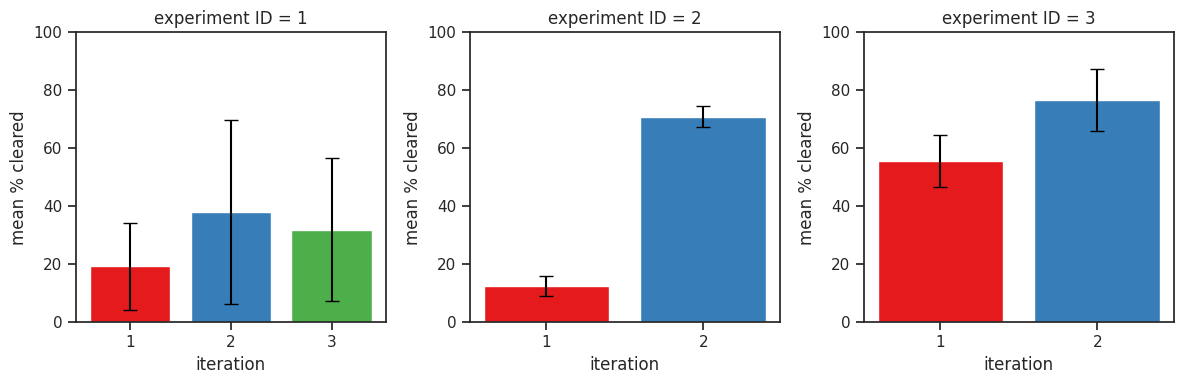

In [16]:
# Group data by experiment_ID and iteration.
grouped = summary.groupby([col_category, col_iteration])

sns.set(style="ticks", palette=palette)

# Create subplots.
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Iterate over groups and plot. Set appropriate x-axis labels corresponding to the
# umber of means in each subplot.
num_bars = 0
for (experiment_id, iteration), group in grouped:
    ax = axes[experiment_id - 1]
    ax.bar(group['iteration'], group['mean'], yerr=group['std'], capsize=5)
    ax.set_title(f'experiment ID = {experiment_id}')
    ax.set_xlabel('iteration')
    ax.set_ylabel(f'mean {col_data}')

    if num_bars < group['iteration'].unique()[0]:
        num_bars = group['iteration'].unique()[0]
    num_bars_range: range= range(1, num_bars + 1)
    ax.set_xticks(num_bars_range)
    ax.set_xticklabels(num_bars_range)
    num_bars = 0  # needs resetting for next iteration

    # Set y-axis limits for all subplots.
    ax.set_ylim(0, 100)

plt.tight_layout()
plt.savefig(f'{_Utility.get_user_data_dir_path()}/method_comparison/data_summary_v1.{fig_png}')
plt.savefig(f'{_Utility.get_user_data_dir_path()}/method_comparison/data_summary_v1.{fig_svg}')
plt.show()

### Statistics

#### Null hypothesis: the fraction of cleared channels is independent of the experimental design

Filter the dataframe such that it only contains the fraction of clearance of the last iteration for each design.

In [26]:
def filter_nth_subcategories(df, col_category: str, col_subcategory: str, is_reset_idx: bool=False) -> pd.DataFrame:
    """Filters a DataFrame to include only the n-th subcategory for each category.

    Args:
    df: The input DataFrame.
    col_category: The name of the category column.
    col_subcategory: The name of the subcategory column.
    is_reset_idx: If true, of output dataframe will be reset.

    Returns:
    A new DataFrame containing only the n-th subcategories for each category.
    """

    # Group by category and find the maximum subcategory for each group
    max_subcategories = df.groupby(col_category)[col_subcategory].max()

    # Create a mask to filter the DataFrame
    mask = df[col_subcategory] == df[col_category].map(max_subcategories)

    # Filter the DataFrame based on the mask
    filtered_df = df[mask]
    
    if is_reset_idx:
        filtered_df = filtered_df.reset_index(drop=True)

    return filtered_df

In [28]:
df_filtered = filter_nth_subcategories(df=df, col_category=col_category, col_subcategory=col_iteration, is_reset_idx=True)
df_filtered

,experiment ID,image filename,chip ID,chip side(f or b),iteration,number of channels not cleared,% cleared
0,3,IMG_7533,N-1,front,2,13,79.6875
1,3,IMG_7534,N-1,back,2,8,87.5000
2,3,IMG_7531,N-2,front,2,8,87.5000
3,3,IMG_7530,N-2,back,2,22,65.6250
4,3,IMG_7528,N-3,front,2,15,76.5625
5,3,IMG_7529,N-3,back,2,24,62.5000
6,1,IMG-_7542,N-4,front,3,56,12.5000
7,1,IMG_7541,N-4,back,3,57,10.9375
8,1,IMG_7543,N-5,front,3,59,7.8125
9,1,IMG_7544,N-5,back,3,59,7.8125


The histogram shows that data in Exp 1 (the only one with 3 iterations) have a different distribution compared to the other two experiments.

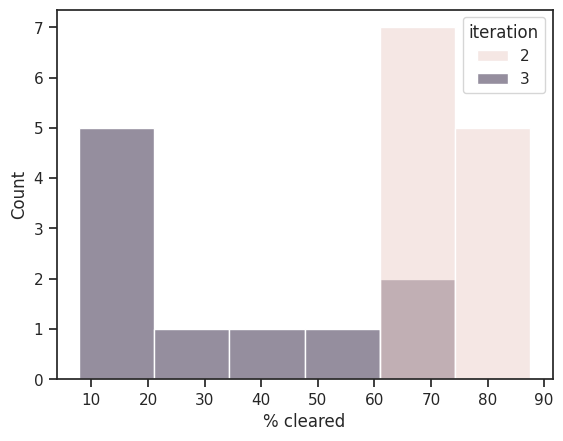

In [30]:
sns.histplot(data=df_filtered, x=col_data, hue=col_iteration)
plt.show()

Let's try to use the second iteration of Experiment 1 instead of the third.

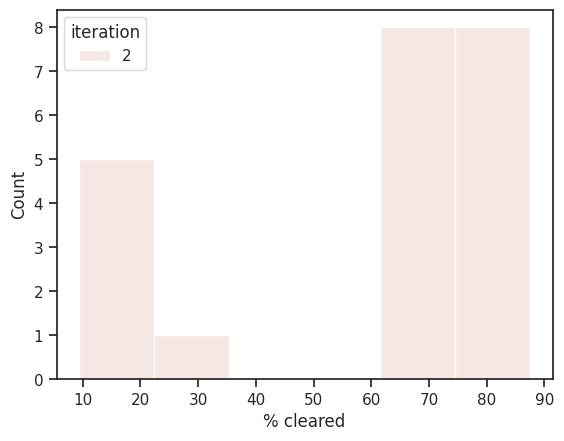

In [40]:
df_filtered = df[df[col_iteration] == 2].reset_index()
sns.histplot(data=df_filtered, x=col_data, hue=col_iteration)
plt.show()

In [41]:
for subcategory, group in df_filtered.groupby(col_iteration):
    stat, p = stats.shapiro(group[col_data])
    print(f"Subcategory {col_iteration}: Shapiro-Wilk test, W={stat}, p={p}")

Subcategory iteration: Shapiro-Wilk test, W=0.7795584841670855, p=0.00024363135897798423


The above plot indicates a bimodality in the Experiment 1 data. Let's split the Exp. 1 data, 2nd iteration, into two groups.

In [42]:
# Assuming 'value_column' is the column you want to compare means for
f_statistic, p_value = stats.f_oneway(*[group[col_data] for name, group in df_filtered.groupby(col_category)])
print(f"ANOVA: F-statistic={f_statistic}, p-value={p_value}")


ANOVA: F-statistic=6.834783454928637, p-value=0.0058049318512011045


In [68]:
# Cast the fraction cleared column as a NumPy array, using the values attribute:
df_filtered
data = df_filtered[df_filtered[col_category] == 1][col_data].values.reshape(-1, 1)
data
n_assumed_distributions = 2
gmm = GaussianMixture(n_components=n_assumed_distributions)
gmm.fit(data)
labels = gmm.predict(data)
labels

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [61]:
data = np.concatenate([np.random.normal(0, 1, 500), np.random.normal(5, 2, 500)])

In [63]:
data.reshape(-1, 1)

array([[ 8.02096305e-01],
       [-8.24440399e-02],
       [ 7.75495163e-01],
       [-5.14158915e-01],
       [ 6.09527494e-01],
       [ 8.77912897e-02],
       [ 8.85841147e-01],
       [ 2.08584643e+00],
       [ 6.61984123e-01],
       [ 1.55723174e+00],
       [ 1.50977074e+00],
       [ 1.39129581e+00],
       [ 8.33755394e-01],
       [ 4.64181608e-01],
       [ 8.86414972e-01],
       [ 1.94189197e-01],
       [-8.53421916e-01],
       [ 8.14438122e-01],
       [ 1.62840176e+00],
       [-6.01676218e-01],
       [ 5.88946304e-01],
       [ 1.41341671e+00],
       [ 4.70238145e-01],
       [-1.83369300e-01],
       [ 5.37227066e-01],
       [-6.83731860e-01],
       [ 1.58084457e+00],
       [ 7.71144985e-01],
       [-2.15871105e-01],
       [ 9.15746142e-02],
       [ 3.15158733e-01],
       [-7.94871691e-01],
       [-1.14014810e+00],
       [-1.30879770e-01],
       [-1.04671935e+00],
       [ 9.58908382e-02],
       [ 3.53103407e-01],
       [-3.37527821e-01],
       [-2.0